### Imports

In [108]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
%matplotlib inline

### Loading data

In [109]:
data_path = 'data'
col_names = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm', 'class']
iris_data = pd.read_csv(os.path.join(data_path, 'iris.data'), header=None, names=col_names)
iris_data.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [110]:
iris_data.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


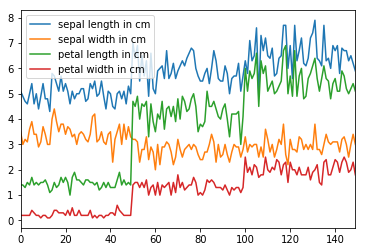

In [140]:
iris_data.plot()
plt.show()

### Encoding
Label encoding and one hot encoding

In [112]:
X = iris_data.values[:,0:4]
Y = iris_data.values[:,4]
# label encoder
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_class = label_encoder.transform(Y)
label_encoded_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [113]:
# one hot encoder
col_mat = label_encoded_class.reshape(-1,1)
one_hot_encoder = OneHotEncoder()
one_hot_encoder = one_hot_encoder.fit(col_mat)
one_hot_encoded_class = one_hot_encoder.transform(col_mat)
one_hot_encoded_class.toarray()[0:10]

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

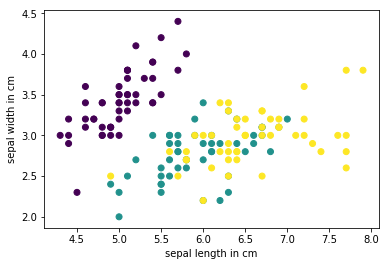

In [143]:
plt.scatter(X[:,0], X[:,1], c=label_encoded_class)
plt.xlabel(col_names[0])
plt.ylabel(col_names[1])
plt.show()

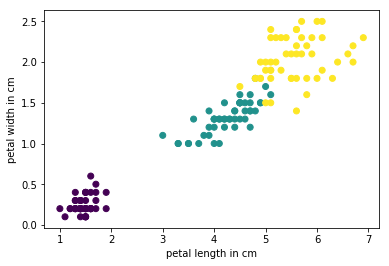

In [144]:
plt.scatter(X[:,2], X[:,3], c=label_encoded_class)
plt.xlabel(col_names[2])
plt.ylabel(col_names[3])
plt.show()

### Classifiers

In [151]:
# partition data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=11)

In [161]:
# using svm
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
s = svm.score(x_test, y_test)
print('svm:', s)


svm: 0.98


In [171]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
nearest_n = KNeighborsClassifier(n_neighbors=5)
nearest_n.fit(x_train, y_train)
s = nearest_n.score(x_test, y_test)
print('knn:', s)



knn: 0.98


In [172]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train, y_train)
s = dec_tree.score(x_test, y_test)
print('decision tree classifier:', s)

decision tree classifier: 0.92


In [186]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(max_depth=5)
random_forest.fit(x_train, y_train)
s = random_forest.score(x_test, y_test)
print('random forest classifier:', s)

random forest classifier: 0.94


In [ ]:
# Gauss
from sklearn.naive_bayes import GaussianNB
gauss_nb = GaussianNB(max_depth=5)
gauss_nb.fit(x_train, y_train)
s = gauss_nb.score(x_test, y_test)
print('random forest classifier:', s)